# *MILESTONE 1 // PHASE 0*

## *Introduction*

#### **Marwan Musa // Batch 12**

| Contact Me | Address |
| --- | --- |
| Email | marwanlmusa@gmail.com |
| Github | https://github.com/marwanmusa |
| Linkedin | https://www.linkedin.com/in/marwanmusa |
| Heroku | https://marwan-musa-ftds12-p0m1.herokuapp.com/ |

## *Problem Identification*

*Topik* : Departemen Pengawasan Lalu Lintas Kementerian Perhubungan Amerika Serikat ingin mengetahui kondisi kasus kecelakaan yang terjadi di jalan selama tahun 2016 yang berguna untuk diterapkan kebijakan baru supaya dapat mengurangi angka kecelakaan di kemudian hari. 

Penjabaran masalah : 
1. Apa saja jalur lalu lintas tempat kejadian perkara (route signing of the trafficway), harmful event yang terjadi, siapa saja *occupants* nya (person type), range pengambilan data? (Deskriptif)
2. Sepuluh Negara Bagian dengan jumlah kecelakaan terbanyak? (Visual)
3. Jumlah kematian berdasarkan bulan kejadian? (Visual, Deskriptif)
4. Apakah konsumsi alkohol mempengaruhi rasio kecelakaan? (Visual)
5. Apakah safety equipment (seperti Helmet, Jacket, Backpack, dsb) memiliki pengaruh terhadap tingkat kematian saat kecelakaan? (Visual)
6. Bagaimana tingkat kecelakaan berdasarkan jalur lalu lintas yang dilewati? (Visual)
7. Berapa minimum, maksimum, median, modus, dan rata-rata usia *occupant* yang terlibat dalam kecelakaan di tiap negara bagian? (Deskriptif // Central Tendency Data)
8. Barapakah rata-rata, variansi dan standar deviasi usia yang terlibat dalam kecelakaan setahun terakhir? (Deskriptif)
9. Bandingkan rata-rata usia korban kecelakaan sebulan terakhir, Apakah berbeda secara signifikan dari 12 bulan terakhir? (Inferensial, Uji Hipotesis)

## *Data Loading & Queries*

### **Queries**

```sql

SELECT accident.state_name, accident.month_of_crash, accident.timestamp_of_crash, accident.latitude, accident.longitude, accident.route_signing_name, accident.first_harmful_event_name, accident.number_of_fatalities, accident.number_of_drunk_drivers, 
person.age, person.sex, person.person_type_name, person.police_reported_alcohol_involvement, person.police_reported_drug_involvement,
safety.non_motorist_safety_equipment_use
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` AS accident
JOIN `bigquery-public-data.nhtsa_traffic_fatalities.person_2016` AS person ON accident.consecutive_number = person.consecutive_number
JOIN `bigquery-public-data.nhtsa_traffic_fatalities.safetyeq_2016` AS safety ON accident.consecutive_number = safety.consecutive_number
WHERE person.age != 998 AND person.age != 999
AND person.sex != "Not Reported" AND person.sex != "Unknown"
AND accident.latitude != 77.7777 AND accident.latitude != 88.888 AND accident.latitude != 99.9999 
AND accident.longitude != 777.7777 AND accident.longitude != 888.8888 AND accident.longitude != 999.9999
AND accident.route_signing_name != "Other" AND accident.route_signing_name != "Unknown"
;

### **Import Module**

In [87]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Loading**

In [88]:
data = pd.read_csv('deployment/dataset_h8dsft_Milestone1_marwan_musa.csv')
df = data.copy()
df.head()

,state_name,month_of_crash,timestamp_of_crash,latitude,longitude,route_signing_name,first_harmful_event_name,number_of_fatalities,number_of_drunk_drivers,age,sex,person_type_name,police_reported_alcohol_involvement,police_reported_drug_involvement,non_motorist_safety_equipment_use
0,Delaware,9,2016-09-16 19:38:00 UTC,39.622619,-75.683589,U.S. Highway,Pedestrian,1,0,26,Female,Driver of a Motor Vehicle In-Transport,No (Alcohol Not Involved),Not Reported,None Used
1,Delaware,11,2016-11-14 20:17:00 UTC,39.819650,-75.547819,U.S. Highway,Pedestrian,1,0,73,Male,Driver of a Motor Vehicle In-Transport,No (Alcohol Not Involved),No (Drugs Not Involved),None Used
2,Delaware,12,2016-12-03 01:39:00 UTC,39.005911,-75.544881,State Highway,Pedestrian,1,0,25,Female,Occupant of a Motor Vehicle Not In-Transport,Not Reported,Not Reported,None Used
3,Delaware,12,2016-12-02 16:19:00 UTC,39.736939,-75.553669,Local Street – Municipality,Pedestrian,1,0,61,Male,Driver of a Motor Vehicle In-Transport,No (Alcohol Not Involved),No (Drugs Not Involved),Unknown if Used
4,Delaware,12,2016-12-03 01:39:00 UTC,39.005911,-75.544881,State Highway,Pedestrian,1,0,47,Male,Occupant of a Motor Vehicle Not In-Transport,Not Reported,Not Reported,None Used


In [89]:
df.tail()

,state_name,month_of_crash,timestamp_of_crash,latitude,longitude,route_signing_name,first_harmful_event_name,number_of_fatalities,number_of_drunk_drivers,age,sex,person_type_name,police_reported_alcohol_involvement,police_reported_drug_involvement,non_motorist_safety_equipment_use
18929,South Carolina,12,2016-12-04 01:20:00 UTC,33.903231,-80.927250,State Highway,Pedestrian,1,0,22,Male,Pedestrian,Not Reported,Not Reported,None Used
18930,South Carolina,1,2016-01-17 20:36:00 UTC,33.501719,-80.457258,Interstate,Motor Vehicle in Transport,1,0,38,Female,Passenger of a Motor Vehicle In-Transport,Not Reported,Not Reported,None Used
18931,South Carolina,2,2016-02-15 19:30:00 UTC,34.858392,-82.347103,Interstate,Parked Motor Vehicle (Not In Transport),1,0,20,Male,Pedestrian,Not Reported,Not Reported,None Used
18932,South Carolina,2,2016-02-15 19:30:00 UTC,34.858392,-82.347103,Interstate,Parked Motor Vehicle (Not In Transport),1,0,20,Male,Pedestrian,Not Reported,Not Reported,None Used
18933,South Carolina,11,2016-11-23 18:00:00 UTC,33.332661,-80.708561,State Highway,Pedestrian,1,1,23,Male,Driver of a Motor Vehicle In-Transport,Yes (Alcohol Involved),No (Drugs Not Involved),None Used


## *Data Cleaning*

In [90]:
df.describe()

,month_of_crash,latitude,longitude,number_of_fatalities,number_of_drunk_drivers,age
count,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000,18934.000000
mean,6.934192,35.965721,-94.091037,1.111334,0.115982,40.812665
std,3.453198,5.232854,16.857174,0.474085,0.325122,20.045417
min,1.000000,19.453906,-161.414183,1.000000,0.000000,0.000000
25%,4.000000,32.702989,-111.854750,1.000000,0.000000,24.000000
50%,7.000000,35.385112,-88.083686,1.000000,0.000000,39.000000
75%,10.000000,40.134181,-81.025930,1.000000,0.000000,56.000000
max,12.000000,62.106492,-68.327761,5.000000,2.000000,101.000000


Di data ini, usia/age 0 adalah bayi yang baru lahir hingga berumur 11 bulan jadi tidak dianggap sebagai `missing values`.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18934 entries, 0 to 18933
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state_name                           18934 non-null  object 
 1   month_of_crash                       18934 non-null  int64  
 2   timestamp_of_crash                   18934 non-null  object 
 3   latitude                             18934 non-null  float64
 4   longitude                            18934 non-null  float64
 5   route_signing_name                   18934 non-null  object 
 6   first_harmful_event_name             18934 non-null  object 
 7   number_of_fatalities                 18934 non-null  int64  
 8   number_of_drunk_drivers              18934 non-null  int64  
 9   age                                  18934 non-null  int64  
 10  sex                                  18934 non-null  object 
 11  person_type_name            

Selanjutnya untuk kolom "timestamp_of_crash" akan diubah typenya menjadi datetime (agar bisa di analisis lebih lanjut).

In [92]:
df['timestamp_of_crash'] =  pd.to_datetime(df['timestamp_of_crash'], infer_datetime_format=True)
df['timestamp_of_crash'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18934 entries, 0 to 18933
Series name: timestamp_of_crash
Non-Null Count  Dtype              
--------------  -----              
18934 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 148.0 KB


## *Analisis dan perhitungan*

### 1. Apa saja jalur lalu lintas tempat kejadian perkara (route signing of the trafficway), harmful event yang terjadi, siapa saja *occupants* nya (person type), range pengambilan data?

In [93]:
# jalur-jalur lalu lintas tempat kejadian perkara
rtn = df.route_signing_name.unique()
pd.DataFrame(rtn)

,0
0,U.S. Highway
1,State Highway
2,Local Street – Municipality
3,Local Street – Township
4,County Road
5,Interstate
6,Local Street – Frontage Road (Since 1994)


In [94]:
# Harmful event yang terjadi
harmev = df.first_harmful_event_name.unique()
pd.DataFrame(harmev)

,0
0,Pedestrian
1,Motor Vehicle in Transport
2,Pedalcyclist
3,Mail Box
4,Non-Motorist on Personal Conveyance
5,Parked Motor Vehicle (Not In Transport)
6,Ridden Animal or Animal-Drawn Conveyance (Sinc...
7,Building
8,Curb
9,Rollover/Overturn


In [95]:
# Siapa saja occupants nya
occu = df.person_type_name.unique()
pd.DataFrame(occu)

,0
0,Driver of a Motor Vehicle In-Transport
1,Occupant of a Motor Vehicle Not In-Transport
2,Passenger of a Motor Vehicle In-Transport
3,Pedestrian
4,Bicyclist
5,Person on Personal Conveyances (Since 2007)
6,Occupant of a Non-Motor Vehicle Transport Device
7,Persons In/On Buildings (Since 2007)
8,Other Cyclist
9,Unknown Type of Non-Motorist


In [96]:
# Range pengambilan data
timegap = df.timestamp_of_crash.max() - df.timestamp_of_crash.min()
print(f'Range pengambilan data : {timegap}') 

Range pengambilan data : 365 days 23:14:00


### 2. Sepuluh Negara Bagian dengan jumlah kecelakaan terbanyak?

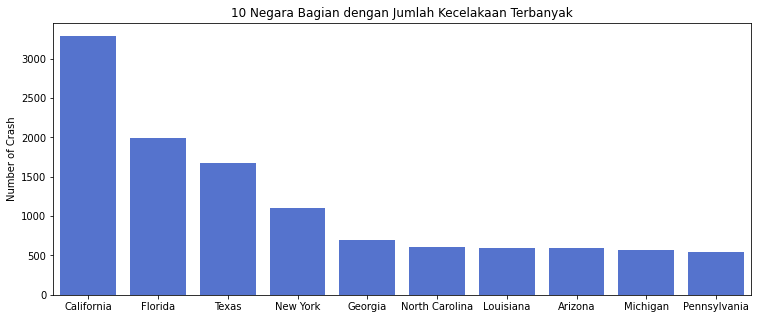

In [97]:
crash_freq = df['state_name'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12.5,5))
sns.barplot(x=crash_freq.index, 
            y=crash_freq, ax=ax, 
            orient='v',
            color = "royalblue")
plt.ylabel("Number of Crash")
plt.title("10 Negara Bagian dengan Jumlah Kecelakaan Terbanyak")
plt.show()

Dari seluruh Negara Bagian di U.S, California menempati rank pertama dengan Jumlah kematian di atas 3000 kasus, kemudian Florida dengan jumlah 2000 kasus dan Texas dengan jumlah hampir setengah kasus yang terjadi di California.

### 3. Jumlah kematian berdasarkan bulan kejadian?

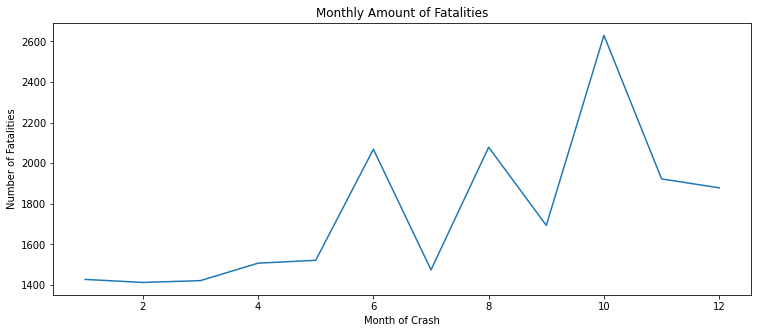

In [98]:
fig1, ax1 = plt.subplots(figsize=(12.5,5))
fatal_data = df.groupby(['month_of_crash']).agg(Sum=('number_of_fatalities', np.sum))
sns.lineplot(x=fatal_data.index, y=fatal_data.Sum, ax=ax1, dashes=False, markers=True,)
plt.ylabel("Number of Fatalities")
plt.xlabel("Month of Crash")
plt.title("Monthly Amount of Fatalities")
plt.show()

Mari awal tahun hingga bulan ke enam kasus kematian per bulan meningkat, setelah itu mengalami fluktuasi selama 3 bulan hingga bulan 10 mencapai puncak rate kasus kematian tertinggi dengan jumlah lebih dari 2600 jiwa dan menurun hingga 2 bulan berikutnya di bulan desember sekitar 23 persen.

### 4. Apakah konsumsi alkohol mempengaruhi rasio kecelakaan?

In [99]:
df.police_reported_alcohol_involvement.unique()

array(['No (Alcohol Not Involved)', 'Not Reported',
       'Yes (Alcohol Involved)', 'Unknown (Police Reported)'],
      dtype=object)

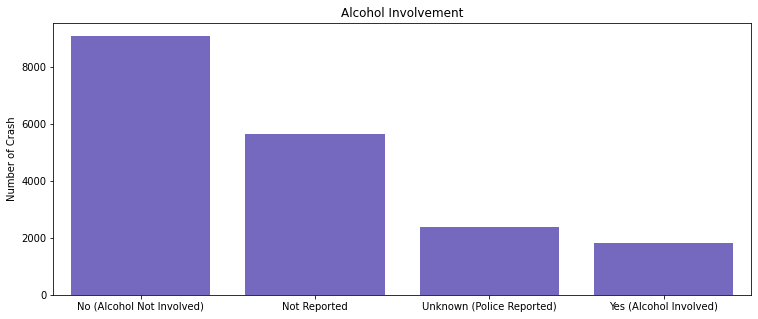

In [100]:
crash_freq_by_alcohol = df['police_reported_alcohol_involvement'].value_counts()

fig3, ax3 = plt.subplots(figsize=(12.5,5))
sns.barplot(x=crash_freq_by_alcohol.index, 
            y=crash_freq_by_alcohol, ax=ax3, 
            orient='v',
            color = "slateblue")
plt.ylabel("Number of Crash")
plt.xticks(size=10)
plt.title("Alcohol Involvement")
plt.show()

Umumnya keterlibatan alkohol sangat erat dengan rasio kecelakaan, namun untuk semua kasus di Negara-negara bagian di U.S, ternyata pengendara non-alkohol lebih banyak yang mengalami kecelakaan daripada pengendara yang terindikasi dalam keadaan mabuk akibat alkohol yang dikonsumsi sebelum berkendara.

### 5. Apakah safety equipment (seperti Helmet, Jacket, Backpack, dsb) memiliki pengaruh terhadap tingkat kematian saat kecelakaan?

In [101]:
df.groupby(['non_motorist_safety_equipment_use'])['number_of_fatalities'].sum().sort_values(ascending=False)

non_motorist_safety_equipment_use
Not Reported                                    11543
None Used                                        8022
Unknown if Used                                   680
Helmet                                            382
Reflective Clothing (Jacket, Backpack, etc.)      250
Other Safety Equipment                             90
Lighting                                           65
Protective Pads (Elbows, Knees, Shins, etc.)       10
Name: number_of_fatalities, dtype: int64

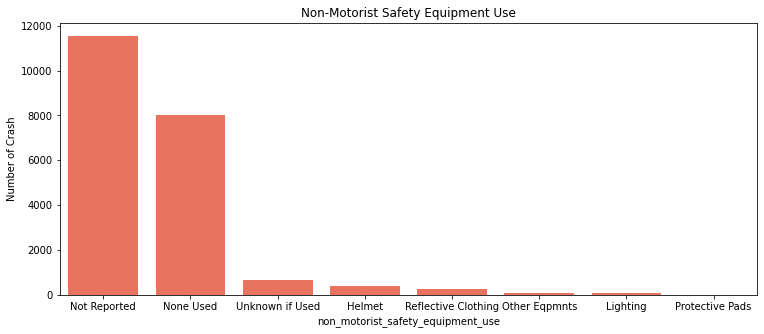

In [102]:
# Kita memodifikasi beberapa value dari "non_motorist_safety_equipment_use" karena terlalu panjang stringnya :
# Reflective Clothing (Jacket, Backpack, etc.) => Reflective Clothing
# Protective Pads (Elbows, Knees, Shins, etc.) => Protective Pads
# Other Safety Equipment => Other Sft. Eqpmnt

df['non_motorist_safety_equipment_use'].replace('Reflective Clothing (Jacket, Backpack, etc.)','Reflective Clothing', inplace=True)
df['non_motorist_safety_equipment_use'].replace('Protective Pads (Elbows, Knees, Shins, etc.)','Protective Pads', inplace=True)
df['non_motorist_safety_equipment_use'].replace('Other Safety Equipment','Other Eqpmnts', inplace=True)

total_fatal_by_equipment = df.groupby(['non_motorist_safety_equipment_use'])\
                                      ['number_of_fatalities'].sum().\
                                        sort_values(ascending=False)

fig4, ax4 = plt.subplots(figsize=(12.5,5))
sns.barplot(x=total_fatal_by_equipment.index, 
            y=total_fatal_by_equipment, ax=ax4, 
            orient='v',
            color = "tomato")
plt.ylabel("Number of Crash")
plt.xticks(size=10)
plt.title("Non-Motorist Safety Equipment Use")
plt.show()

Banyak kasus kematian tidak diketahui apakah occupants memakai alat pelindung atau semacamnya saat kejadian berlangsung (Not Reported). Namun, berdasar data dari grafik, dapat disimpulkan bahwa occupants dengan tanpa safety equipment sama sekali kemungkinan kematian dalam kecelakaannya meningkat 8 hingga 10 kali lipat dari yang memakai pelindung seperti helmet, reflective clothing dan lain-lain. 

### 6. Bagaimana tingkat kecelakaan berdasarkan jalur lalu lintas yang dilewati?

In [103]:
df.route_signing_name.unique()

array(['U.S. Highway', 'State Highway', 'Local Street – Municipality',
       'Local Street – Township', 'County Road', 'Interstate',
       'Local Street – Frontage Road (Since 1994)'], dtype=object)

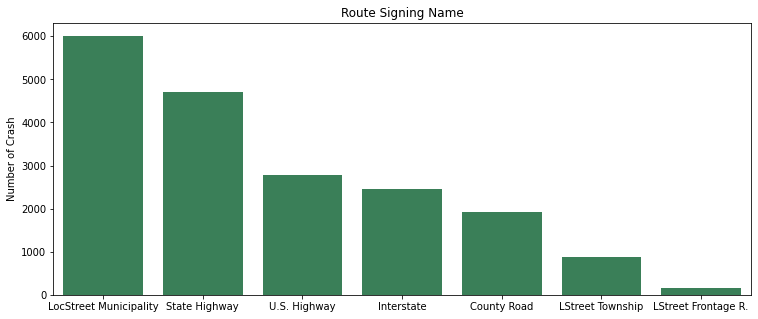

In [104]:
# Kita memodifikasi beberapa nama dari signing route karena terlalu panjang :
# Local Street – Municipality => LocStreet Municipality
# Local Street – Township => LocStreet Township
# Local Street – Frontage Road (Since 1994) => LocStreet Frontage R.

df['route_signing_name'].replace('Local Street – Municipality','LocStreet Municipality', inplace=True)
df['route_signing_name'].replace('Local Street – Township','LStreet Township', inplace=True)
df['route_signing_name'].replace('Local Street – Frontage Road (Since 1994)','LStreet Frontage R.', inplace=True)

crash_freq1 = df['route_signing_name'].value_counts()

fig2, ax2 = plt.subplots(figsize=(12.5,5))
sns.barplot(x=crash_freq1.index, 
            y=crash_freq1, ax=ax2, 
            orient='v',
            color = "Seagreen")
plt.ylabel("Number of Crash")
plt.xticks(size=10)
plt.title("Route Signing Name")
plt.show()

Berdasarkan data, terdapat 3 local street di sejumlah negara bagian yang ada di U.S yaitu local street Municipality, local street Township dan local street Frontage Road. Dari ketiga locat street tersebut, Municipality merupakan jalur dengan jumlah kecelakaan terbanyak untuk seluruh negara bagian, kemudian State highway dan U.S highway. Sedangkan local street Township dan Frontage Road persentasi kecelakaannya lebih kecil dari jalur Interstate dan County road.

### 7. Berapa minimum, maksimum, median, modus, dan rata-rata usia *occupant* yang terlibat dalam kecelakaan di tiap negara bagian?

In [105]:
# using agg() function on dropoff_site column
df_sn = df.groupby(['state_name']).agg(Minimum=('age', np.min),
                                        Maximum=('age', np.max),
                                        Mean=('age', np.mean),
                                        Median=('age', np.median), 
                                        Modus=('age', stats.mode))
            
# Displaying result
display(df_sn.sort_values(by='Mean', ascending=False))


,Minimum,Maximum,Mean,Median,Modus
state_name,,,,,
Rhode Island,18,92,51.121212,53.0,"([18], [2])"
Massachusetts,14,94,48.400000,51.0,"([64], [5])"
Wyoming,15,68,46.666667,54.0,"([56], [2])"
Minnesota,5,93,46.059603,46.0,"([63], [8])"
Oregon,0,91,45.424603,45.5,"([31], [12])"
Montana,3,89,44.891892,45.0,"([44], [3])"
Maine,13,91,44.645833,38.0,"([22], [3])"
Washington,3,90,44.583630,45.0,"([19], [9])"
Michigan,0,92,44.463158,46.0,"([53], [22])"


Rhode Island, Massachusets, dan Wyoming merupakan 3 negara bagian dengan rata-rata usia paling tinggi yang terlibat dalam kecelakaan (occupants in a crash) yaitu usia 46 sampai 51 tahun (dewasa menuju lansia). Sedangkan South Dakota merupakan Negara Bagian dengan rata-rata usia occupants 25 tahun (remaja).

### 8. Barapakah rata-rata, variansi dan standar deviasi usia yang terlibat dalam kecelakaan setahun terakhir?

In [106]:
print('Minimum Age : ' + str(df['age'].min()))
print('Maximum Age : ' + str(df['age'].max()))
print('Range Age : ' + str(df['age'].max() - df['age'].min()))
print('Variance Age : ' + str('{:0.2f}'.format(df['age'].var())))
print('Standar Deviasi Age : ' + str('{:0.2f}'.format(df['age'].std())))

Minimum Age : 0
Maximum Age : 101
Range Age : 101
Variance Age : 401.82
Standar Deviasi Age : 20.05


Range usia yang terlibat dalam kecelakaan setahun terakhir adalah adalah 101 tahun (lansia) dengan minimum usia 0 (0 hingga 11 bulan) dan maximum 101 tahun. Jika rata-rata usia yang terlibat dalam kecelakaan di U.S adalah 41 tahun, maka usia occupants lainnya akan berkisar ±20 tahun dari usia rata-rata.

### 9. Bandingkan rata-rata usia korban kecelakaan sebulan terakhir, Apakah berbeda secara signifikan dari 12 bulan terakhir?

Misalkan selama 1 tahun terakhir, di seluruh Negara Bagian setiap hari jumlah kematian dalam kecelakaan rata-rata 1 orang dan selama sebulan terakhir, jumlah kematian dalam kecelakaan mencapai rata-rata 3 orang per hari. Apakah ini berarti jumlah kematian dalam kecelakaan di seluruh Negara Bagian meningkat secara signifikan?

In [107]:
daily_fatality = df[['timestamp_of_crash','number_of_fatalities']].groupby('timestamp_of_crash').sum()
print('Average number of fatalities a Day for the last a month: {}'.format(np.round(daily_fatality['number_of_fatalities'].mean())))

Average number of fatalities a Day for the last a month: 3.0


Untuk memeriksa apakah daily jumlah kematian dalam kecelakaan meningkat secara signifikan atau tidak, akan dilakukan *single sample one sided* dengan significance level 0,05. Metode ini digunakan karena variabel yang diuji hanya satu dan komparasinya hanya di sampel (data satu bulan terakhir) dan populasi (yang diasumsikan data satu tahun terakhir).

Jadi hipotesis untuk kasus ini :

**H0: μ <= 3**

**H1: μ > 3**

In [108]:
daily_fatality

,number_of_fatalities
timestamp_of_crash,
2016-01-01 00:06:00+00:00,1
2016-01-01 00:34:00+00:00,3
2016-01-01 00:45:00+00:00,2
2016-01-01 01:19:00+00:00,4
2016-01-01 01:40:00+00:00,4
...,...
2016-12-31 19:30:00+00:00,3
2016-12-31 21:21:00+00:00,4
2016-12-31 21:54:00+00:00,2


In [109]:
t_stat,p_val = stats.ttest_1samp(daily_fatality['number_of_fatalities'], 3)
print('P-value:',p_val/2) # The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.1560049352999725
t-statistics: 1.0110897336088829


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


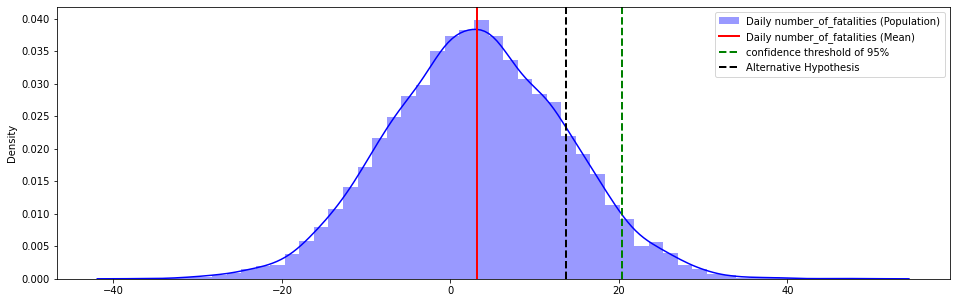

In [110]:
daily_fatality_pop = np.random.normal(daily_fatality['number_of_fatalities'].mean(), daily_fatality['number_of_fatalities'].std(), 10000)

ci = stats.norm.interval(0.90, daily_fatality['number_of_fatalities'].mean(), daily_fatality['number_of_fatalities'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_fatality_pop, label='Daily number_of_fatalities (Population)', color='blue')
plt.axvline(daily_fatality['number_of_fatalities'].mean(), color='red', linewidth=2, label='Daily number_of_fatalities (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_fatality_pop.mean() + t_stat*daily_fatality_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**Karena p-value lebih besar dari `0.05`, maka fail to reject H0**. <br>


Sehingga :
<center>

**"Jumlah rata-rata kematian per kecelakaan di seluruh Negara Bagian di U.S tidak meningkat secara signifikan satu bulan terakhir,**<br> 
**artinya ada kasus kematian rata-rata yang cukup signifikan di bulan lainnya."**

## *Pengambilan Kesimpulan*

Dari seluruh Negara Bagian di U.S, California menempati rank pertama dengan Jumlah kematian di atas 3000 kasus, kemudian Florida dengan jumlah 2000 kasus dan Texas dengan jumlah hampir setengah kasus yang terjadi di California. 

Sebenarnya cukup banyak faktor yang sangat berperan dalam terjadinya kecelakaan hingga menyebabkan korban, diantaranya berkendara dalam keadaan mabuk (bagi pengendara) dan alat pelindung bagi occupants atau siapapun yang terlibat dalam kecelakaan itu. Faktor pertama, umumnya keterlibatan alkohol sangat erat dengan ratio kecelakaan, namun untuk semua kasus di Negara-negara bagian di U.S, ternyata pengendara non-alkohol lebih banyak yang mengalami kecelakaan daripada pengendara yang terindikasi dalam keadaan mabuk akibat alkohol yang dikonsumsi sebelum berkendara.

Selanjutnya, faktor alat pelindung saat kecelakaan. Banyak kasus kematian tidak diketahui apakah occupants memakai alat pelindung atau semacamnya saat kejadian berlangsung. Namun, berdasarkan data, dapat disimpulkan bahwa occupants dengan tanpa safety equipment sama sekali probabilitas kematian dalam kecelakaannya meningkat 8 hingga 10 kali lipat dari yang memakai pelindung seperti helmet, reflective clothing dan lain-lain. 

Berdasarkan klasifikasi jalur atau jalan yang dilewati, di sejumlah Negara Bagian yang ada di U.S, terdapat 3 local street yaitu local street Municipality, local street Township dan local street Frontage Road. Dari ketiga locat street tersebut, Municipality merupakan jalur dengan jumlah kecelakaan terbanyak untuk seluruh Negara Bagian, kemudian State highway dan U.S highway. Sedangkan local street Township dan Frontage Road persentasi kecelakaannya lebih kecil dari Interstate dan County road.

Range usia yang terlibat dalam kecelakaan setahun terakhir adalah adalah 101 tahun (lansia) dengan minimum usia 0 (0 hingga 11 bulan) dan maximum 101 tahun. Jika rata-rata usia yang terlibat dalam kecelakaan di U.S adalah 41 tahun, maka usia occupants lainnya akan berkisar ±20 tahun dari usia rata-rata.

Rhode Island, Massachusets, dan Wyoming adalah 3 negara bagian dengan rata-rata usia paling tinggi yang terlibat dalam kecelakaan (occupants in a crash) yaitu usia 46 sampai 51 tahun (dewasa menuju lansia). Sedangkan South Dakota merupakan Negara Bagian dengan rata-rata usia occupants 25 tahun (remaja). Sehingga ini bisa dijadikan sebagai pertimbangan kedepan bagi pemerintah di tiap-tiap Negara Bagian terutama Departemen Pengawasan Lalu Lintas Kementerian Perhubungan Amerika Serikat untuk mengajukan regulasi tentang pembaharuan tata ruang kota yang lebih aman dan tertata dengan baik sehingga tidak terlalu bahaya bagi orang-orang tua yang yang berkegiatan di jalan raya, walau hanya untuk jalan santai saja. Untuk Negara bagian South Dakota, agar sekiranya Departemen Pengawasan Lalu Lintas juga bisa mensosialisasikan kepada semua orang tua agar memperhatikan atau menasihati anak-anak remajanya untuk lebih aware dengan keadaan di jalan raya atau jalur lalu lintas kota.

Mulai awal tahun hingga bulan juni, kasus kematian per bulan meningkat, setelah itu mengalami fluktuasi selama 3 bulan. Menariknya, di bulan oktober kasus kematian mencapai puncak rate tertinggi dengan jumlah lebih dari 2600 jiwa dan menurun hingga 2 bulan berikutnya di bulan desember sekitar 23 persen. Apakah jumlah kasus ini berhubungan erat dengan rata-rata kasus kematian perbulan?

Setelah dilakukan uji hipotesis, "Jumlah rata-rata kematian per kecelakaan di seluruh Negara Bagian di U.S tidak meningkat secara signifikan satu bulan terakhir di 2016, artinya ada kasus kematian rata-rata yang cukup signifikan di bulan lainnya." Hasil uji hipotesis ini di dukung oleh analisis sebelumnya bahwa telah diperoleh jumlah kematian paling tinggi selama setahun di 2016 ada di bulan Oktober.